Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [6]:
big_mart_data = pd.read_csv('Train.csv')

In [7]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
big_mart_data.shape

(8523, 12)

In [13]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [16]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [20]:
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [22]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

/var/folders/kc/x_p0yhjn09n5k0crg4zv67q40000gn/T/ipykernel_83142/2509980927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)


In [24]:
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [26]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [28]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [30]:
miss_values = big_mart_data['Outlet_Size'].isnull()

In [32]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [34]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [36]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [39]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [42]:
sns.set()

<Figure size 600x600 with 0 Axes>

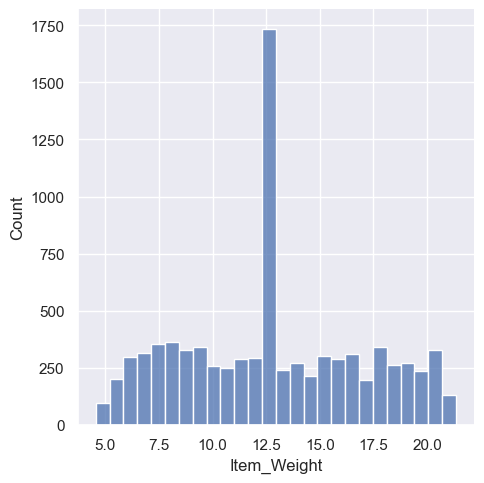

In [44]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

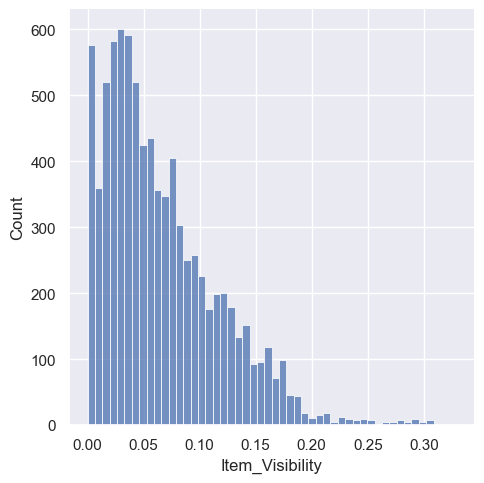

In [46]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

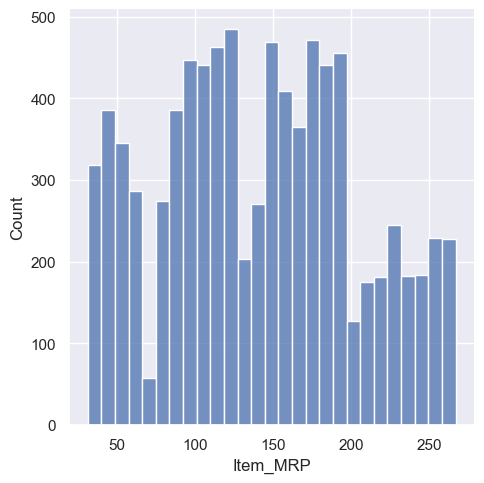

In [48]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_MRP'])
plt.show()

<Figure size 600x600 with 0 Axes>

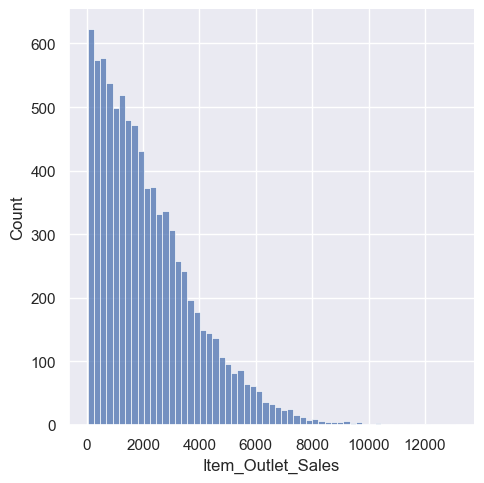

In [50]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(big_mart_data['Item_Outlet_Sales'])
plt.show()

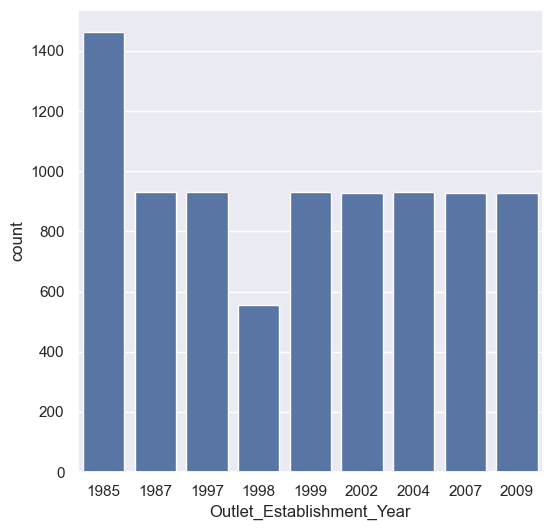

In [52]:
# Outlet_Establishment_Year 
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

Categorical Features

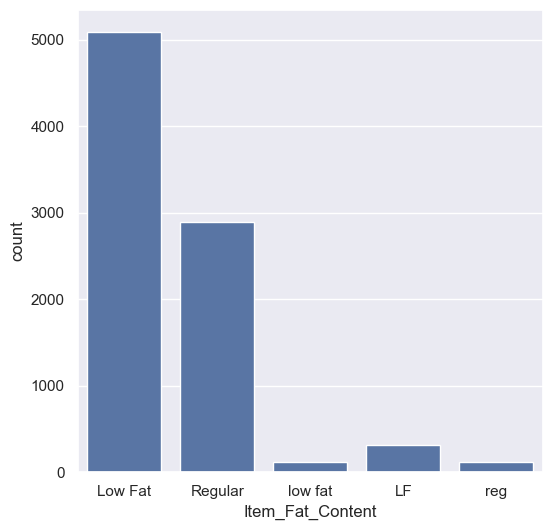

In [55]:
# Item_Fat_Content 
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

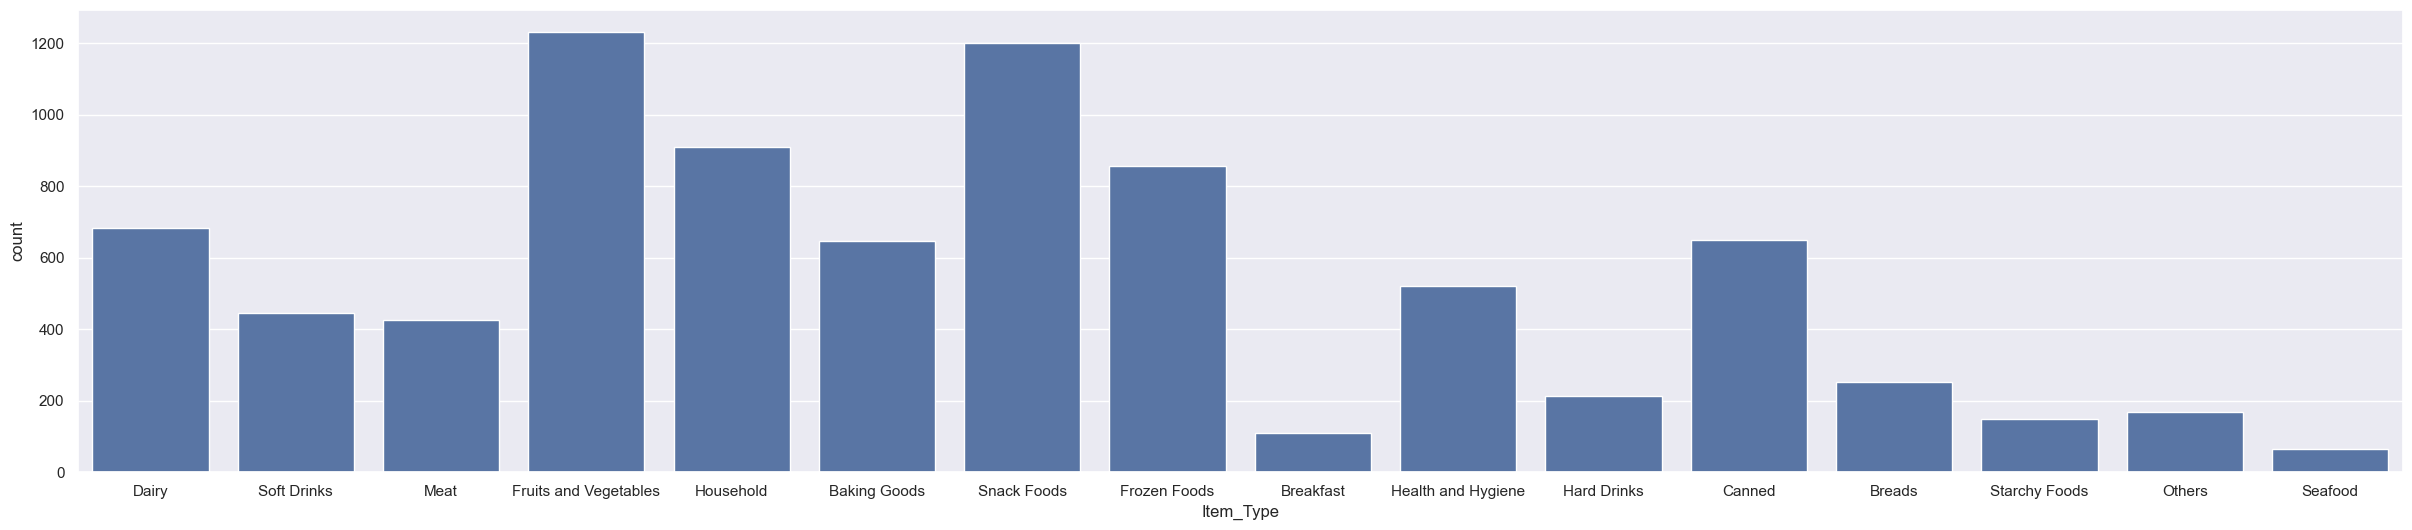

In [57]:
# Item_Type 
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

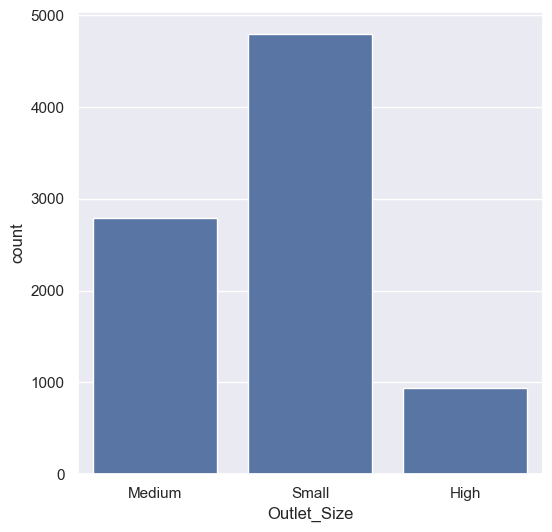

In [59]:
# Outlet_Size 
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

Data Pre-Processing

In [62]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [64]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [66]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [68]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding

In [71]:
encoder = LabelEncoder()

In [73]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [75]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and Target

In [78]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [80]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [82]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into Training data & Testing Data

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [87]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

XGBoost Regressor

In [91]:
regressor = XGBRegressor()

In [93]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

In [96]:
training_data_prediction = regressor.predict(X_train)

In [98]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [100]:
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [102]:
test_data_prediction = regressor.predict(X_test)

In [104]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [106]:
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692


In [108]:
rf_regressor = RandomForestRegressor(
    n_estimators=100,      
    random_state=42,       
    max_depth=10,          
    min_samples_split=5,   
    min_samples_leaf=2     
)

In [110]:
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [111]:
rf_train_prediction = rf_regressor.predict(X_train)

In [114]:
rf_r2_train = metrics.r2_score(Y_train, rf_train_prediction)

In [116]:
print('R Squared value = ', rf_r2_train)

R Squared value =  0.7246867873238958


In [118]:
rf_test_prediction = rf_regressor.predict(X_test)

In [120]:
rf_r2_test = metrics.r2_score(Y_test, rf_test_prediction)

In [122]:
print('R Squared value = ', rf_r2_test)

R Squared value =  0.5761214156705057


In [124]:
print(f"XGBoost Test R²: {r2_test:.4f} (50.2%)")
print(f"Random Forest Test R²: {rf_r2_test:.4f} (57.6%)")

Current Performance:
XGBoost Test R²: 0.5017 (50.2%)
Random Forest Test R²: 0.5761 (57.6%)


🔍 XGBoost Feature Importance:
                      Feature  Importance  Importance_Pct
10                Outlet_Type    0.655168       65.516838
5                    Item_MRP    0.111768       11.176782
7   Outlet_Establishment_Year    0.086253        8.625328
4                   Item_Type    0.022841        2.284115
9        Outlet_Location_Type    0.021260        2.125983
2            Item_Fat_Content    0.020159        2.015893
3             Item_Visibility    0.018762        1.876179
0             Item_Identifier    0.017140        1.714041
1                 Item_Weight    0.015937        1.593656
8                 Outlet_Size    0.015669        1.566864
6           Outlet_Identifier    0.015043        1.504323


/var/folders/kc/x_p0yhjn09n5k0crg4zv67q40000gn/T/ipykernel_83142/2537261096.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_importance_df, x='Importance', y='Feature', palette='viridis')


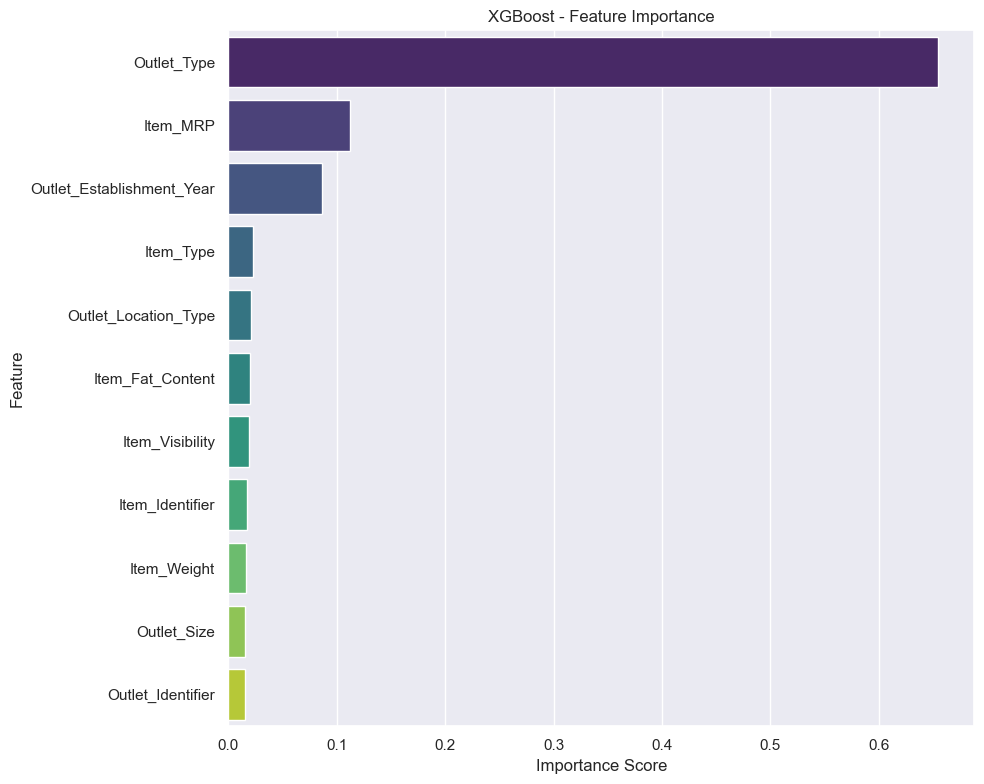

In [126]:
# Get feature importance from your trained XGBoost model
xgb_importance = regressor.feature_importances_
feature_names = X.columns

xgb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance,
    'Importance_Pct': (xgb_importance / xgb_importance.sum()) * 100
}).sort_values('Importance', ascending=False)

print("🔍 XGBoost Feature Importance:")
print(xgb_importance_df)

plt.figure(figsize=(10, 8))
sns.barplot(data=xgb_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('XGBoost - Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

Random Forest Feature Importance:

🔍 Random Forest Feature Importance:
                      Feature  Importance  Importance_Pct
5                    Item_MRP    0.507161       50.716066
10                Outlet_Type    0.335528       33.552800
3             Item_Visibility    0.041987        4.198692
0             Item_Identifier    0.034581        3.458105
7   Outlet_Establishment_Year    0.033784        3.378440
1                 Item_Weight    0.018095        1.809492
4                   Item_Type    0.016816        1.681618
6           Outlet_Identifier    0.005408        0.540780
2            Item_Fat_Content    0.002728        0.272796
9        Outlet_Location_Type    0.002342        0.234221
8                 Outlet_Size    0.001570        0.156989


/var/folders/kc/x_p0yhjn09n5k0crg4zv67q40000gn/T/ipykernel_83142/1759456763.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='rocket')


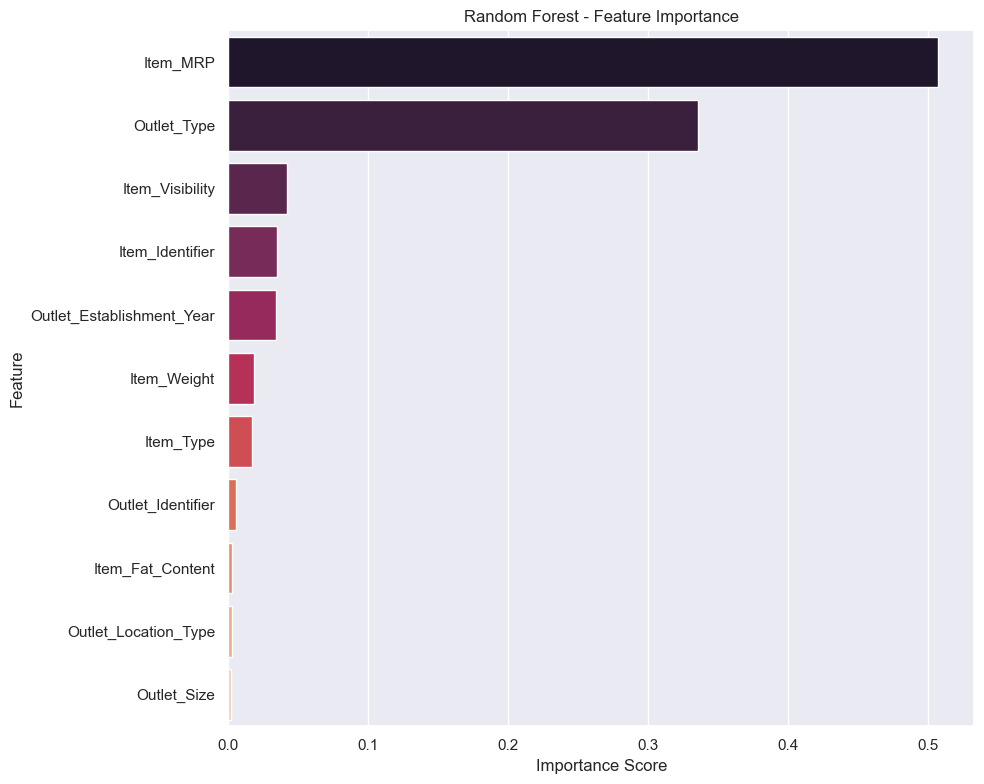

In [129]:
# Get feature importance from Random Forest model
rf_importance = rf_regressor.feature_importances_

rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance,
    'Importance_Pct': (rf_importance / rf_importance.sum()) * 100
}).sort_values('Importance', ascending=False)

print("🔍 Random Forest Feature Importance:")
print(rf_importance_df)

plt.figure(figsize=(10, 8))
sns.barplot(data=rf_importance_df, x='Importance', y='Feature', palette='rocket')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [131]:
columns_to_drop = ['Item_Visibility', 'Item_Identifier', 'Item_Weight', 'Outlet_Size', 'Outlet_Identifier']

updatedDatasetXgboost = big_mart_data.drop(columns=columns_to_drop)

print("Original dataset shape:", big_mart_data.shape)
print("Updated dataset shape:", updatedDatasetXgboost.shape)
print("Dropped columns:", columns_to_drop)


Original dataset shape: (8523, 12)
Updated dataset shape: (8523, 7)
Dropped columns: ['Item_Visibility', 'Item_Identifier', 'Item_Weight', 'Outlet_Size', 'Outlet_Identifier']


In [133]:
updatedDatasetXgboost.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,4,249.8092,1999,0,1,3735.1380
1,1,14,48.2692,2009,2,2,443.4228
2,0,10,141.6180,1999,0,1,2097.2700
3,1,6,182.0950,1998,2,0,732.3800
4,0,9,53.8614,1987,2,1,994.7052


In [135]:
X = updatedDatasetXgboost.drop(columns='Item_Outlet_Sales', axis=1)
Y = updatedDatasetXgboost['Item_Outlet_Sales']

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [139]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 6) (6818, 6) (1705, 6)


In [141]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [143]:
updated_training_data_prediction = regressor.predict(X_train)

In [145]:
updated_r2_train = metrics.r2_score(Y_train, updated_training_data_prediction)

In [147]:
print('R Squared value = ', updated_r2_train)

R Squared value =  0.8131644237429146


In [149]:
updated_test_data_prediction = regressor.predict(X_test)

In [151]:
updated_r2_test = metrics.r2_score(Y_test, updated_test_data_prediction)

In [153]:
print('R Squared value = ', updated_r2_test)

R Squared value =  0.49451884321029727


In [155]:
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [156]:
updated_rf_train_prediction = rf_regressor.predict(X_train)

In [159]:
updated_rf_r2_train = metrics.r2_score(Y_train, updated_rf_train_prediction)

In [161]:
print('R Squared value = ', updated_rf_r2_train)

R Squared value =  0.6994361506034262


In [163]:
updated_rf_test_prediction = rf_regressor.predict(X_test)

In [165]:
updated_rf_r2_test = metrics.r2_score(Y_test, rf_test_prediction)

In [167]:
print('R Squared value = ', updated_rf_r2_test)

R Squared value =  0.5761214156705057


In [169]:
print("Current Performance:")
print(f"XGBoost Test R²: {updated_r2_test:.4f}")
print(f"Random Forest Test R²: {updated_rf_r2_test:.4f}")

Current Performance:
XGBoost Test R²: 0.4945
Random Forest Test R²: 0.5761


In [171]:
import time
from sklearn.model_selection import RandomizedSearchCV
print(f"Dataset shape: {X_train.shape}")

xgb_param_grid = {
    'n_estimators': [100, 200, 300, 500, 700],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [1, 1.5, 2, 3]
}

start_time = time.time()

xgb_random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=xgb_param_grid,
    n_iter=50,              
    cv=5,                   
    scoring='r2',
    n_jobs=-1,              
    random_state=42,
    verbose=1               
)

xgb_random_search.fit(X_train, Y_train)

tuning_time = (time.time() - start_time) / 60

print(f"Tuning completed in {tuning_time:.1f} minutes")
print(f"Best CV R²: {xgb_random_search.best_score_:.4f}")
print(f"Best Parameters: {xgb_random_search.best_params_}")

Dataset shape: (6818, 6)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Tuning completed in 0.2 minutes
Best CV R²: 0.6047
Best Parameters: {'subsample': 0.9, 'reg_lambda': 2, 'reg_alpha': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


In [172]:
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7, None],
    'bootstrap': [True, False]
}

start_time = time.time()

rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=50,              
    cv=5,                   
    scoring='r2',
    n_jobs=-1,              
    random_state=42,
    verbose=1               
)

rf_random_search.fit(X_train, Y_train)

rf_tuning_time = (time.time() - start_time) / 60

print(f"Random Forest tuning completed in {rf_tuning_time:.1f} minutes")
print(f"Best CV R²: {rf_random_search.best_score_:.4f}")
print(f"Best Parameters: {rf_random_search.best_params_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest tuning completed in 1.1 minutes
Best CV R²: 0.5989
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 0.7, 'max_depth': 5, 'bootstrap': False}


In [173]:
best_xgb = xgb_random_search.best_estimator_

In [174]:
xgb_tuned_pred = best_xgb.predict(X_test)

xgb_tuned_r2 = metrics.r2_score(Y_test, xgb_tuned_pred)

In [175]:
print(xgb_tuned_r2)

0.5879894750229528


In [176]:
best_rf = rf_random_search.best_estimator_

In [177]:
rf_tuned_pred = best_rf.predict(X_test)

rf_tuned_r2 = metrics.r2_score(Y_test, rf_tuned_pred)

In [178]:
print(rf_tuned_r2)

0.5808609500071701


In [188]:
best_score = max(updated_r2_test, updated_rf_r2_test, xgb_tuned_r2, rf_tuned_r2)
print(f"\n🏆 BEST CURRENT SCORE: {best_score*100:.2f}%")


🏆 BEST CURRENT SCORE: 58.80%
